In [8]:
import sys
sys.path.append('/home/user1/OneDrive/Documents/Projects/Correlated QEC/corrqec/')

import matplotlib.pyplot as plt
import numpy as np

from src.noisemodel import LongTimePairPoly, LongTimeStreakPoly, LongTimePairMPoly, LongTimeStreakMPoly, LongTimePairCPoly, LongTimePairCPoly, LongTimeStreakCPoly
from src.sample import sample_tcorr_matrix
from src.visualization import plot_temporal_correlation_matrix

In [9]:
# Universal parameters
shots = 100_000
repetitions = 100
d = 5
r = 10
A = 1
n = 2
p = 1e-4

# Models
model1a_kwargs = {"NoiseModel": LongTimePairPoly,
                 "model_params": {"p": p, "A": A, "n": n, "noisy_qubits": "data"},
                 "scl_noise": ["after_clifford_depolarization", "before_measure_flip_probability", "after_reset_flip_probability"],
                 }

model1b_kwargs = {"NoiseModel": LongTimeStreakPoly,
                 "model_params": {"p": p, "A": A, "n": n, "noisy_qubits": "data"},
                 "scl_noise": ["after_clifford_depolarization", "before_measure_flip_probability", "after_reset_flip_probability"],
                 }

model2a_kwargs = {"NoiseModel": LongTimePairMPoly,
                 "model_params": {"p": p, "A": A, "n": n},
                 "scl_noise": ["before_round_data_depolarization", "after_clifford_depolarization", "after_reset_flip_probability"],
                 }

model2b_kwargs = {"NoiseModel": LongTimeStreakMPoly,
                  "model_params": {"p": p, "A": A, "n": n},
                  "scl_noise": ["before_round_data_depolarization", "after_clifford_depolarization", "after_reset_flip_probability"],
                  }

model3a_kwargs = {"NoiseModel": LongTimePairCPoly,
                  "model_params": {"p": p, "A": .5, "n": n},
                  "scl_noise": ["before_round_data_depolarization", "before_measure_flip_probability", "after_reset_flip_probability"],
                  }

model3b_kwargs = {"NoiseModel": LongTimeStreakCPoly,
                  "model_params": {"p": p, "A": .5, "n": n},
                  "scl_noise": ["before_round_data_depolarization", "before_measure_flip_probability", "after_reset_flip_probability"],
                  }

model_kwargs_list = [model1a_kwargs, model1b_kwargs, model2a_kwargs, model2b_kwargs, model3a_kwargs, model3b_kwargs]
labels = ["Class 0 (Pairwise)", 
          "Class 0 (Streaky)", 
          "Class 1 (Pairwise)", 
          "Class 1 (Streaky)", 
          "Class 2 (Pairwise)", 
          "Class 2 (Streaky)"]

In [10]:
corr_matrix_list = []
for i in range(len(model_kwargs_list)):
    corr_matrix = sample_tcorr_matrix(**model_kwargs_list[i], distance=d, rounds=r, shots=shots, repetitions=repetitions)
    corr_matrix_list.append(corr_matrix)

/tmp/ipykernel_8153/3755229118.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('../figures/output/experiment1_corr_matrix.pdf', dpi=600, bbox_inches='tight')
/tmp/ipykernel_8153/3755229118.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('../figures/output/experiment1_corr_matrix.svg', dpi=600, bbox_inches='tight')
/home/user1/anaconda3/envs/qec/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/user1/anaconda3/envs/qec/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


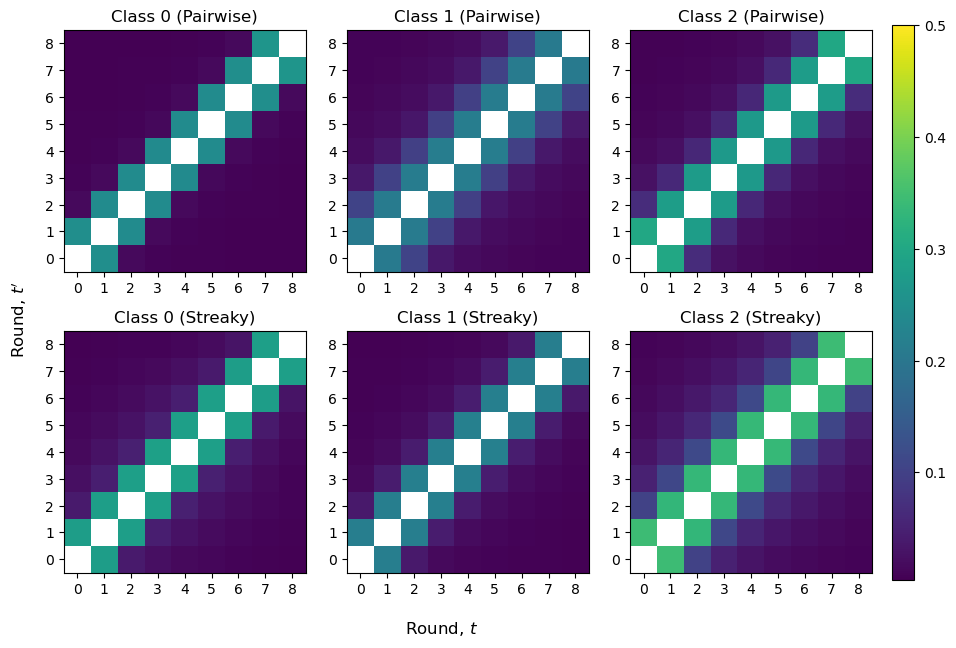

In [11]:
from matplotlib import colormaps

norm_max = .5

fig, axs = plt.subplots(2, 3, figsize=(9, 6.5))

for i in range(len(corr_matrix_list)):
    matrix = corr_matrix_list[i].copy()
    np.fill_diagonal(matrix.values, norm_max)
    
    ax = axs[i%2, i//2]
    
    # ax.imshow(matrix)
    cmap = colormaps['viridis']
    norm = plt.Normalize(0, norm_max)
    
    rgba = cmap(norm(matrix))
    l = rgba.shape[0]
    rgba[range(l), range(l), :3] = 1, 1, 1
    
    im = ax.imshow(matrix, visible=False, cmap=cmap, origin='lower')
    ax.imshow(rgba, origin='lower')
    major_loc = np.arange(corr_matrix.shape[0])
    ax.set_xticks(major_loc)
    ax.set_yticks(major_loc)
    ax.set_title(labels[i])
    
cbar_ax = fig.add_axes([1., 0.1, 0.025, 0.8525])
fig.colorbar(im, cax=cbar_ax)
    
fig.supxlabel("Round, $t$")
fig.supylabel("Round, $t'$")
fig.set_tight_layout(True)
fig.patch.set_alpha(0)

fig.savefig('../figures/output/experiment1_corr_matrix.pdf', dpi=600, bbox_inches='tight')
fig.savefig('../figures/output/experiment1_corr_matrix.svg', dpi=600, bbox_inches='tight')

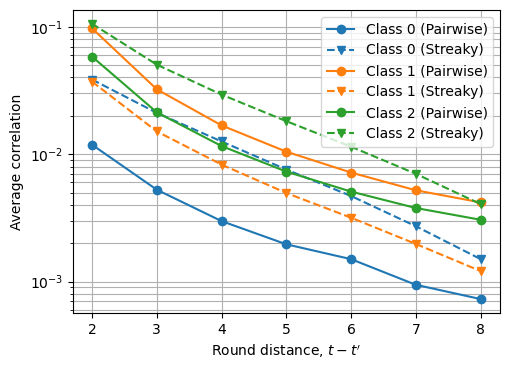

In [12]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = [color for color in prop_cycle.by_key()['color'][:3] for _ in range(2)]
markers = ['o', 'v'] * 3
linestyles = ['-', '--'] * 3
fig, ax = plt.subplots(figsize=(5.2, 3.8))

for i in range(len(corr_matrix_list)):
    matrix = corr_matrix_list[i]
    X = list(range(2, matrix.shape[0]))
    Y = [np.mean(np.diagonal(matrix, offset=j)) for j in X]
    ax.plot(X, Y, marker=markers[i], linestyle=linestyles[i], color=colors[i], label=labels[i])
        
ax.semilogy()
ax.legend()

# Axis label
ax.set_xlabel("Round distance, $t-t'$")
ax.set_ylabel("Average correlation")
ax.grid()
ax.grid(True, which='both', axis='y')

fig.tight_layout()
fig.patch.set_alpha(0)

fig.savefig("../figures/output/experiment1_mean_tcorr.pdf", dpi=600)
fig.savefig("../figures/output/experiment1_mean_tcorr.svg", dpi=600)